# Forest Fire Detector Model for Drones

In [33]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

## Data Import

In [34]:
image_height = 256
image_width = 256
batch_size = 32

In [35]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = train_datagen.flow_from_directory(
        r'C:\Users\deepchanddc2\Downloads\the_wildfire_dataset_2n_version\train',
        target_size=(image_height, image_width),
        batch_size=batch_size,
        class_mode='binary',
        subset='training')

val_generator = train_datagen.flow_from_directory(
        r'C:\Users\deepchanddc2\Downloads\the_wildfire_dataset_2n_version\test',
        target_size=(image_height, image_width),
        batch_size=batch_size,
        class_mode='binary',
        subset='validation')


Found 1216 images belonging to 2 classes.
Found 76 images belonging to 2 classes.


## Model Building

In [36]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])


In [37]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


## Model Training

In [38]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


history = model.fit(
      train_generator,
      steps_per_epoch=train_generator.samples // train_generator.batch_size,
      epochs=20,
      validation_data=val_generator,
      validation_steps=val_generator.samples // val_generator.batch_size,  
      callbacks=[early_stopping],
      verbose=1)


Epoch 1/20
38/38 [==============================] - 5s 121ms/step - loss: 0.3741 - accuracy: 0.8528 - val_loss: 0.1789 - val_accuracy: 0.8906
Epoch 2/20
38/38 [==============================] - 4s 112ms/step - loss: 0.2190 - accuracy: 0.9268 - val_loss: 0.3228 - val_accuracy: 0.8594
Epoch 3/20
38/38 [==============================] - 4s 113ms/step - loss: 0.1515 - accuracy: 0.9482 - val_loss: 0.0928 - val_accuracy: 0.9688
Epoch 4/20
38/38 [==============================] - 4s 112ms/step - loss: 0.1104 - accuracy: 0.9688 - val_loss: 0.2638 - val_accuracy: 0.8906
Epoch 5/20
38/38 [==============================] - 4s 113ms/step - loss: 0.0829 - accuracy: 0.9663 - val_loss: 0.1214 - val_accuracy: 0.9531
Epoch 6/20
38/38 [==============================] - 4s 112ms/step - loss: 0.0735 - accuracy: 0.9753 - val_loss: 0.1725 - val_accuracy: 0.9531
Epoch 7/20
38/38 [==============================] - 4s 113ms/step - loss: 0.0511 - accuracy: 0.9868 - val_loss: 0.2536 - val_accuracy: 0.9219
Epoch 

## Model Performance

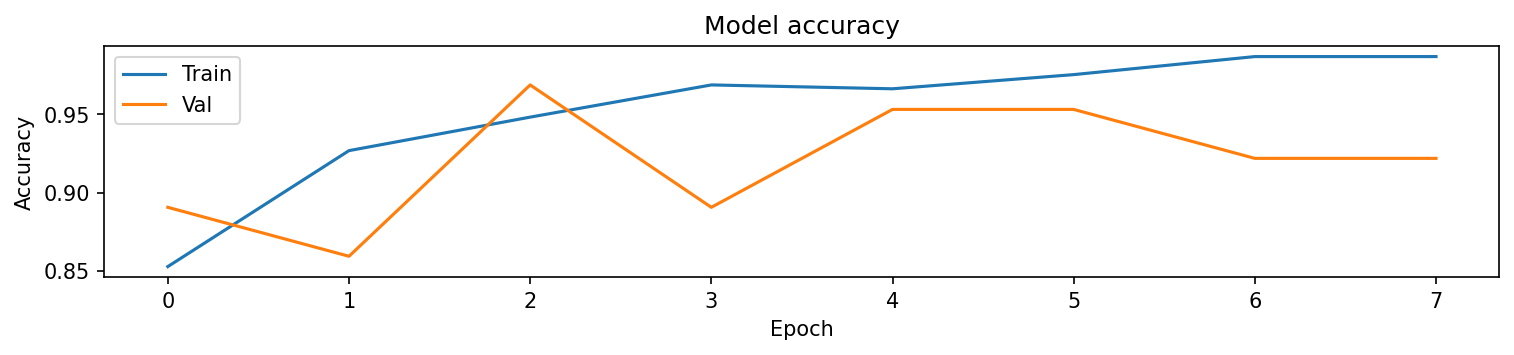

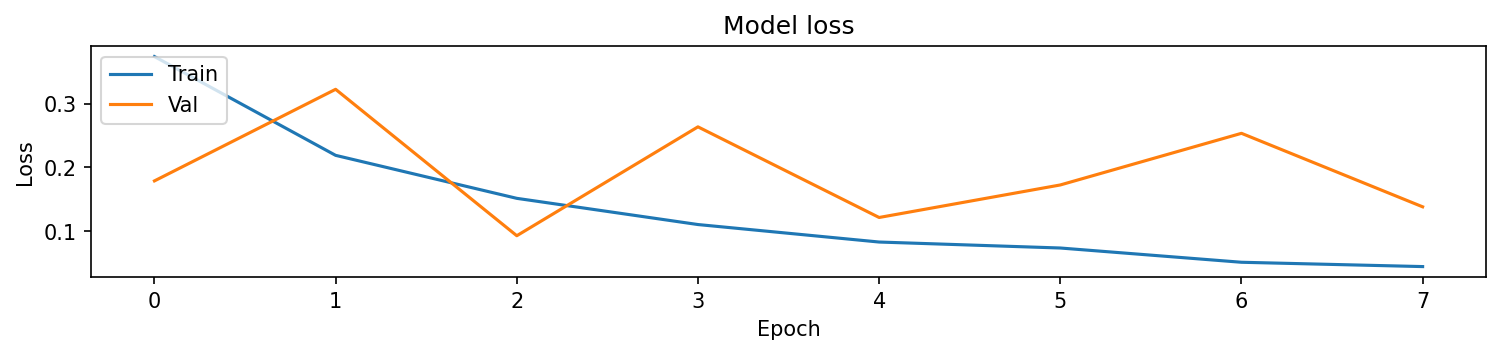

In [39]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize = (12,2),dpi = 150)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize = (12,2),dpi = 150)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


In [40]:
from sklearn.metrics import confusion_matrix, classification_report

predictions = model.predict(val_generator)
y_pred = np.round(predictions)

# True labels
y_true = val_generator.classes

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

print("Confusion Matrix:")
print(conf_matrix)

# Classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred))

3/3 [==============================] - 1s 340ms/step
Confusion Matrix:
[[21 17]
 [18 20]]

Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.55      0.55        38
           1       0.54      0.53      0.53        38

    accuracy                           0.54        76
   macro avg       0.54      0.54      0.54        76
weighted avg       0.54      0.54      0.54        76



## Save The Model

In [41]:
model_path = 'D:\data science\Data scientist\Projects\Project 5 CV'
model.save(model_path)
print(f"Model saved to {model_path}.")

INFO:tensorflow:Assets written to: D:\data science\Data scientist\Projects\Project 5 CV\assets


INFO:tensorflow:Assets written to: D:\data science\Data scientist\Projects\Project 5 CV\assets


Model saved to D:\data science\Data scientist\Projects\Project 5 CV.


## Prediction From Test Data

1/1 [==============================] - 0s 70ms/step


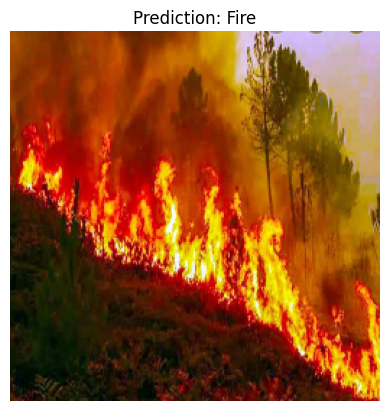

In [49]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load the trained model
model = load_model(r'D:\data science\Data scientist\Projects\Project 5 CV')

# Function to preprocess the image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(256, 256))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    return img, img_array

# Function to make prediction
def predict_image(img_path):
    img, img_array = preprocess_image(img_path)
    prediction = model.predict(img_array)
    if prediction[0][0] < 0.5:
        return "Fire", img
    else:
        return "No Fire", img

# Path to the image you want to predict
image_path = r"C:\Users\deepchanddc2\Downloads\2cfac2c4-9939-11eb-b6da-741abfac58ca_1617975791232.jpg"

# Predict
prediction, img = predict_image(image_path)

# Display the image
plt.imshow(img)
plt.title('Prediction: ' + prediction)
plt.axis('off')
plt.show()


## Prediction using Camera ( OpenCV )

In [54]:
# for drone camera
import cv2
import numpy as np
from tensorflow.keras.models import load_model


model = load_model(r'D:\data science\Data scientist\Projects\Project 5 CV')


cap = cv2.VideoCapture(0) 


classes = ['No fire', 'Fire']

while True:
    ret, frame = cap.read()

    resized_frame = cv2.resize(frame, (256, 256)) 
    preprocessed_frame = resized_frame / 255.0 

    
    input_data = np.expand_dims(preprocessed_frame, axis=0) 
    prediction = model.predict(input_data)[0] 

    predicted_class = np.argmax(prediction)
    confidence = prediction[predicted_class]
    if confidence < 0.5:
        label = f'{classes[1]} ({confidence:.2f})'
        cv2.putText(frame, label, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    else:
        label = f'{classes[0]} ({confidence:.2f})'
        cv2.putText(frame, label, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
   

    

  
    cv2.imshow('Forest Fire Detection', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and close all windows
cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 19ms/step
